In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
dataset = pd.read_csv('Position_Salaries.csv')
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


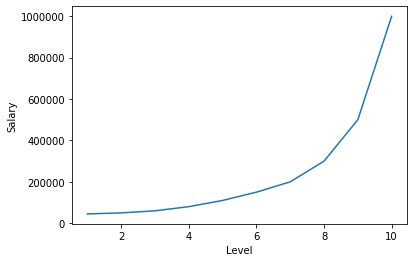

In [6]:
ax = sns.lineplot(x="Level", y="Salary", data=dataset)

In [7]:
X = dataset.iloc[:, 1]
y = dataset.iloc[:, 2]

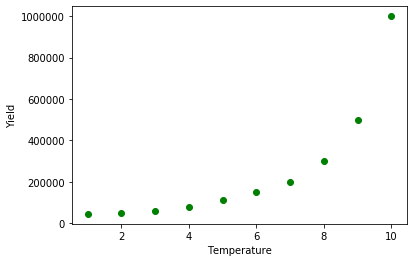

In [8]:
plt.scatter(X, y, color='green')
plt.xlabel('Temperature')
plt.ylabel('Yield');

In [14]:
X = np.array(X).reshape(-1, 1)
y = np.array(y).reshape(-1, 1)


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [19]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [20]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression().fit(X, y)

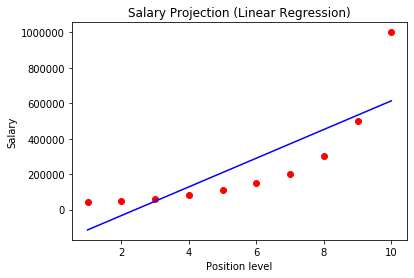

In [21]:
plt.scatter(X, y, color = 'red')
plt.plot(X, linear_regressor.predict(X), color = 'blue')
plt.title('Salary Projection (Linear Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [22]:
from sklearn.metrics import mean_squared_error, r2_score
mean_squared_error(y, linear_regressor.predict(X))
r2_score(y, linear_regressor.predict(X))

0.6690412331929895

In [23]:
linear_regressor.predict(np.array(6.5).reshape(-1, 1))

array([[330378.78787879]])

In [24]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_regressor = PolynomialFeatures(degree = 4) #try 2,3 and 4
X_polynomial = polynomial_regressor.fit_transform(X)
linear_regressor_2 = LinearRegression()
linear_regressor_2.fit(X_polynomial, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

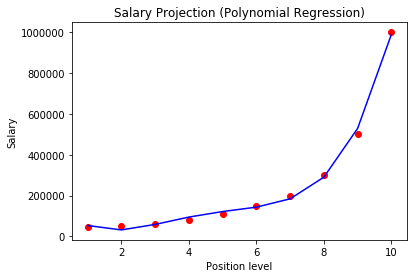

In [25]:
plt.scatter(X, y, color = 'red')
plt.plot(X, linear_regressor_2.predict(polynomial_regressor.fit_transform(X)), color = 'blue')
plt.title('Salary Projection (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

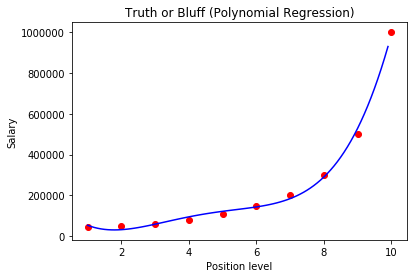

In [26]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, linear_regressor_2.predict(polynomial_regressor.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [27]:
linear_regressor_2.predict(polynomial_regressor.fit_transform(np.array(6.5).reshape(-1, 1)))

array([[158862.45265153]])